In [22]:
import tellurium as te
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
from roadrunner import Config, RoadRunner, Logger
Logger.disableLogging()
Config.setValue(Config.ROADRUNNER_DISABLE_PYTHON_DYNAMIC_PROPERTIES, True)
Config.setValue(Config.LOADSBMLOPTIONS_RECOMPILE, False) 
Config.setValue(Config.LLJIT_OPTIMIZATION_LEVEL, 4)
Config.setValue(Config.LLVM_SYMBOL_CACHE, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_GVN, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_CFG_SIMPLIFICATION, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_COMBINING, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_INST_ELIMINATION, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_DEAD_CODE_ELIMINATION, True)
Config.setValue(Config.LOADSBMLOPTIONS_OPTIMIZE_INSTRUCTION_SIMPLIFIER, True)
Config.setValue(Config.SIMULATEOPTIONS_COPY_RESULT, True)

r_unfit = te.loadSBMLModel('models/240621_VN_Metabolism_Gly_Keq.sbml')
r_unfit.integrator.absolute_tolerance = 1e-8
r_unfit.integrator.relative_tolerance = 1e-8
r_unfit.integrator.maximum_num_steps = 2000

r_fit = te.loadSBMLModel('results/240707_VNMetGly_Keq_PSOs/240621_VN_Metabolism_Gly_Keq_fitted.sbml')
r_fit.integrator.absolute_tolerance = 1e-8
r_fit.integrator.relative_tolerance = 1e-8
r_fit.integrator.maximum_num_steps = 2000



In [23]:
with open('results/240707_VNMetGly_Keq_PSOs/train_myprob.obj', 'rb') as file:
    myprob = pickle.load(file)

In [73]:
fitp_dict = {k:v for k,v in zip(r_fit.getGlobalParameterIds(), r_fit.getGlobalParameterValues())}

kcat_labels = [p for p in fitp_dict.keys() if 'Kcat_V' in p]
kcat_values = [((r_unfit['Kcat_F_'+i.split('_')[-1]]*r_unfit['Kcat_R_'+i.split('_')[-1]])**0.5) for i in kcat_labels]
for k,v in zip(kcat_labels, kcat_values): r_unfit[k] = v
unfitp_dict = {k:v for k,v in zip(r_unfit.getGlobalParameterIds(), r_unfit.getGlobalParameterValues())}

In [29]:
parameters = myprob.parameter_labels[:-1]

In [59]:
unfitp = np.array([unfitp_dict[p] for p in parameters])
fitp = np.array([fitp_dict[p] for p in parameters])

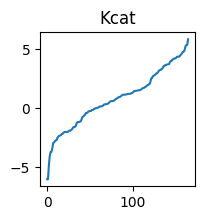

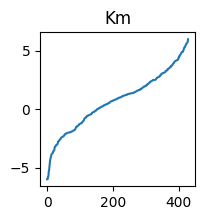

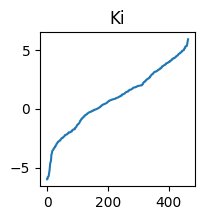

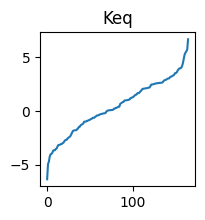

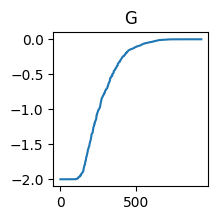

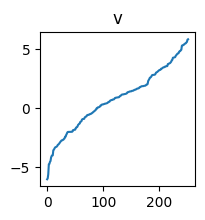

In [77]:
for i in ['Kcat','Km','Ki','Keq','G','v']:
    index = [i in p for p in parameters]
    plt.figure(figsize=(2,2))
    plt.title(i)
    plt.plot(np.sort(np.log10(((fitp[index]+1e-12)/(unfitp[index]+1e-12)))))

In [61]:
order = np.argsort(np.log10(((fitp+1e-12)/(unfitp+1e-12))))

In [65]:
np.array(parameters)[order[-50:]]

array(['Km_C05223_EC231180', 'Ki_C05745_EC231180', 'Km_C00091_EC1242',
       'Ki_C00009_EC31311', 'Ki_C00197_EC5311', 'Ki_C00037_EC21210',
       'Kcat_V_R78', 'Km_C01419_EC34111', 'Keq_R158', 'Km_C00112_EC27140',
       'v126', 'Km_C00014_EC43119', 'Ki_C00074_EC31311', 'v244',
       'Ki_C00001_EC34111', 'v38', 'Ki_C00097_EC341123', 'v68',
       'Kcat_V_R46', 'Km_C00011_EC231180', 'Ki_C03479_EC21210',
       'Ki_C00008_EC63414', 'Kcat_V_R130', 'Ki_C00004_EC11137', 'v100',
       'v118', 'Km_C00111_EC41213', 'Keq_R45', 'v117', 'Km_C05382_EC2212',
       'v115', 'Ki_C00009_EC6323', 'Km_C00112_EC27111', 'v137', 'Keq_R69',
       'v230', 'Km_C00004_EC21210', 'Ki_C00037_EC1814',
       'Km_C02972_EC21210', 'Km_C00005_EC11144', 'Keq_R70',
       'Ki_C16832_EC1814', 'Km_C00008_EC27111', 'Km_C03785_EC27111',
       'v26', 'v37', 'Kcat_V_R49', 'Ki_C00074_EC5311',
       'Km_C00085_EC27111', 'Keq_R160'], dtype='<U19')

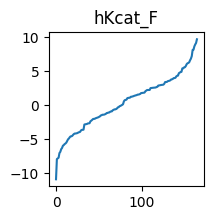

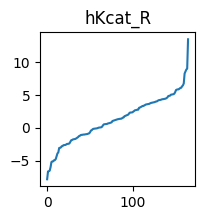

In [84]:
plt.figure(figsize=(2,2))
plt.title('hKcat_F')
plt.plot(np.sort(np.log10(
    np.array([fitp_dict[p]+1e-12 for p in [p for p in unfitp_dict.keys() if 'hKcat_F' in p]])
     /np.array([unfitp_dict[p]+1e-12 for p in [p for p in unfitp_dict.keys() if 'hKcat_F' in p]])
     )))

plt.figure(figsize=(2,2))
plt.title('hKcat_R')
plt.plot(np.sort(np.log10(
    np.array([fitp_dict[p]+1e-12 for p in [p for p in unfitp_dict.keys() if 'hKcat_R' in p]])
     /np.array([unfitp_dict[p]+1e-12 for p in [p for p in unfitp_dict.keys() if 'hKcat_R' in p]])
     )))

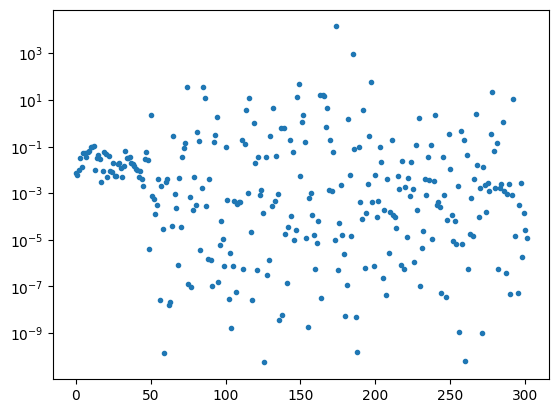

In [86]:
plt.plot(r_fit.getFloatingSpeciesConcentrations(),'.')
plt.yscale('log')